# Lab 3 - ANNDA

In [1]:
import hopfield
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hopfield Networks

## Convergence and Attractors

In [2]:
# Memory patterns
x1 = np.array([[-1,-1,1,-1,1,-1,-1,1]])
x2 = np.array([[-1,-1,-1,-1,-1,1,-1,-1]])
x3 = np.array([[-1,1,1,-1,-1,1,-1,1]])
X = np.append(x1,np.append(x2,x3,axis=0),axis=0)

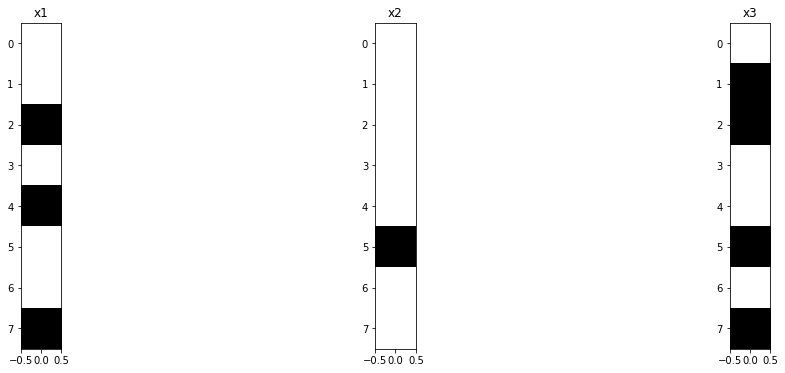

In [3]:
# Show input patterns
hopfield.show_patterns(X.T)

In [4]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])

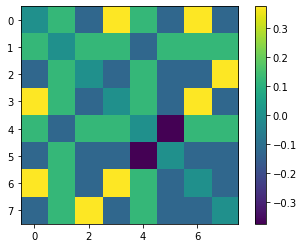

In [5]:
# Compute weight matrix
hopnet.train_W(X)
np.fill_diagonal(X @ X.T,0)
# Plot weights matrix
hopnet.plot_weights()

### Apply update rule to distorted patterns

In [6]:
# Define distorted patterns
x1d = np.array([[1,-1,1,-1,1,-1,-1,1]]) # one bit error
x2d = np.array([[1,1,-1,-1,-1,1,-1,-1]]) # two bit errors
x3d = np.array([[1,1,1,-1,1,1,-1,1]]) # two bit errors
Xd = np.append(x1d,np.append(x2d,x3d,axis=0),axis=0)

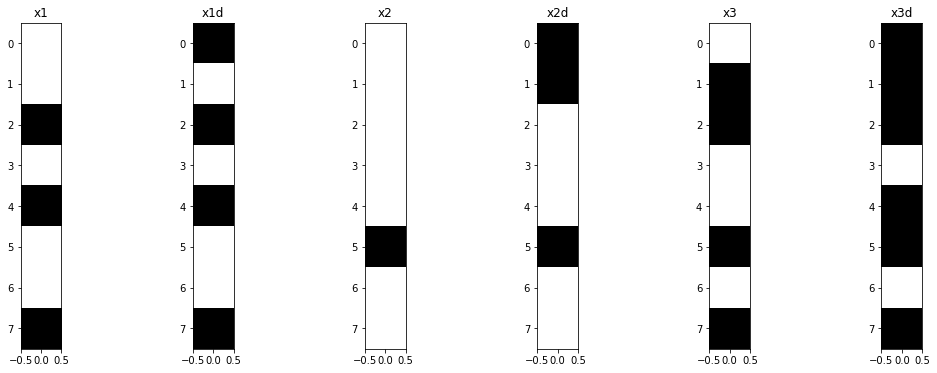

In [7]:
# Plot original and distorted patterns
hopfield.show_patterns_distorted(X.T,Xd.T)

In [8]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]

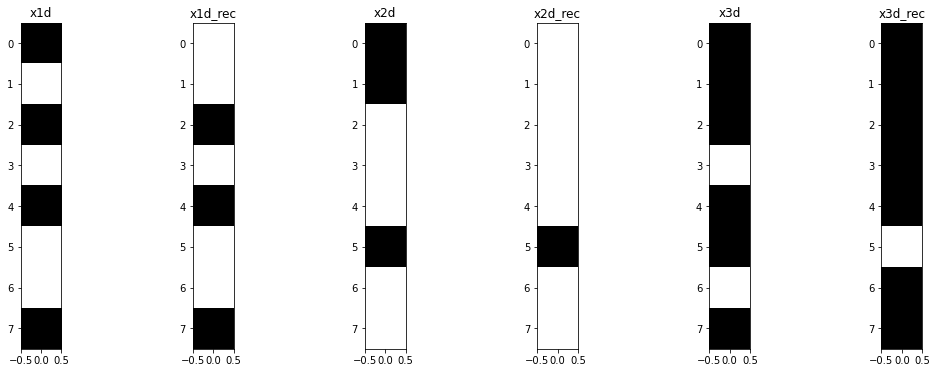

In [9]:
# Plot original and recovered distorted patterns
hopfield.show_patterns_distorted(Xd.T,Xd_rec.T,name='d',recovered=True)

### How many attractors are there in the network?

In [10]:
# Find all attractors iterating over all possible input patterns
n_steps = 20
attractors = hopnet.find_attractors(n_steps)

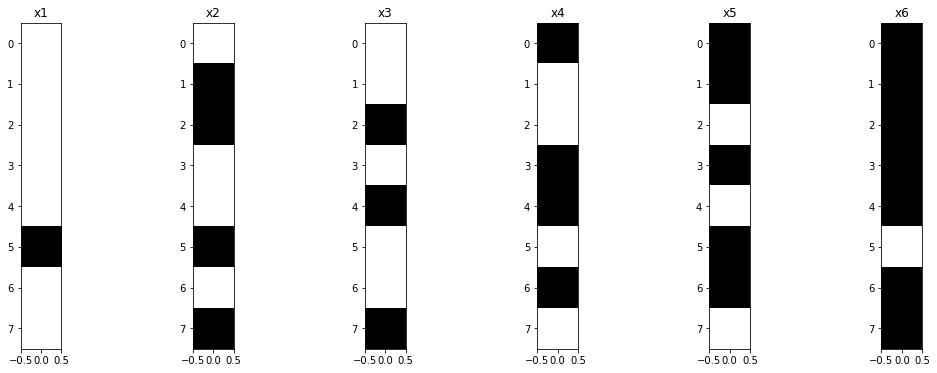

In [11]:
# Plot found attractors
hopfield.show_patterns(attractors.T)

### What happens if more than half of the pattern is distorted?

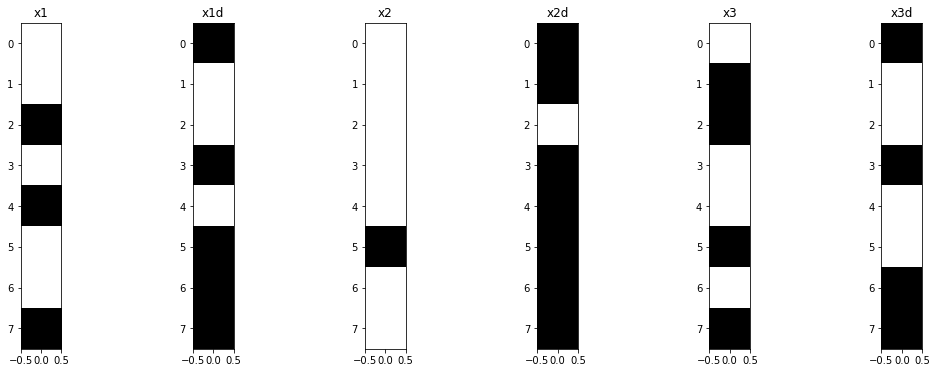

In [12]:
# Distort 6 bits in each pattern
Xd = hopfield.distort_patterns(X,6)
# Plot original and distorted patterns
hopfield.show_patterns_distorted(X.T,Xd.T)

In [13]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]

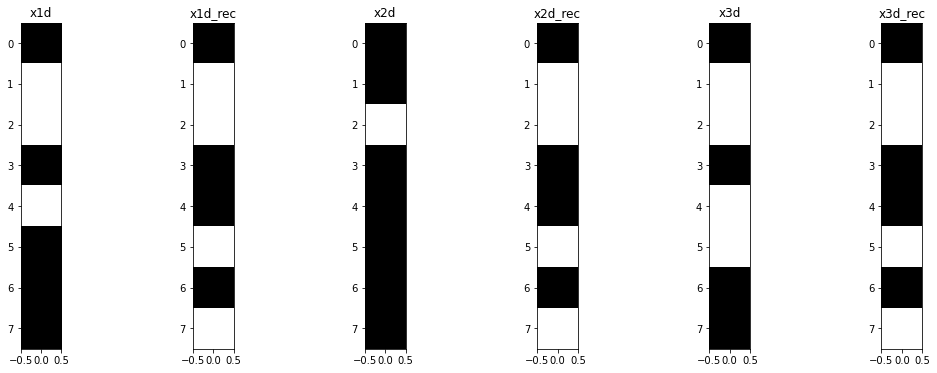

In [14]:
# Plot original and recovered distorted patterns
hopfield.show_patterns_distorted(Xd.T,Xd_rec.T,name='d',recovered=True)

## Sequential Update

In [15]:
# Define input patterns - Read row pictures data
pictures = np.genfromtxt('data/pict.dat', delimiter=',').reshape((11,1024))
X = pictures[0:3,:]

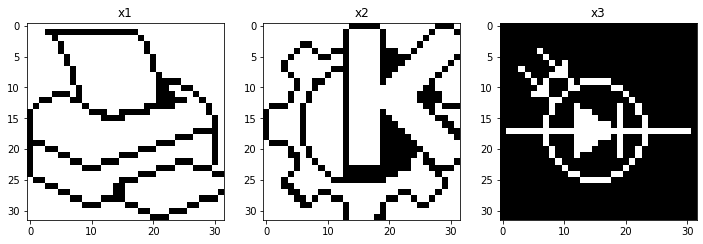

In [16]:
# Show input patterns
hopfield.show_img_patterns(X)

### Can the network recover a degraded pattern?

In [17]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])
# Compute weight matrix
hopnet.train_W(X)

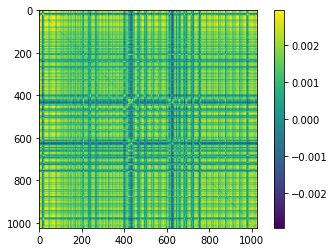

In [18]:
# Plot weights matrix
hopnet.plot_weights()

In [19]:
# Distort bits in each pattern
Xd = hopfield.distort_patterns(X,2**6)

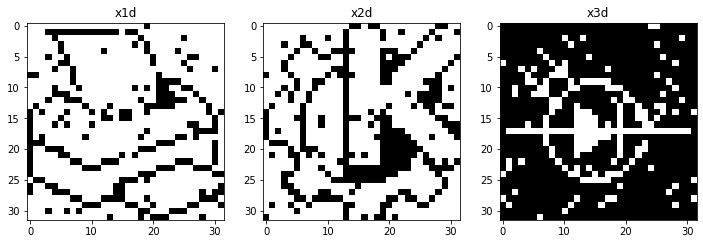

In [20]:
# Plot distorted patterns
hopfield.show_img_patterns(Xd,name='d')

In [21]:
# Asynchronous recall over distorted patterns
n_steps = 100
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]

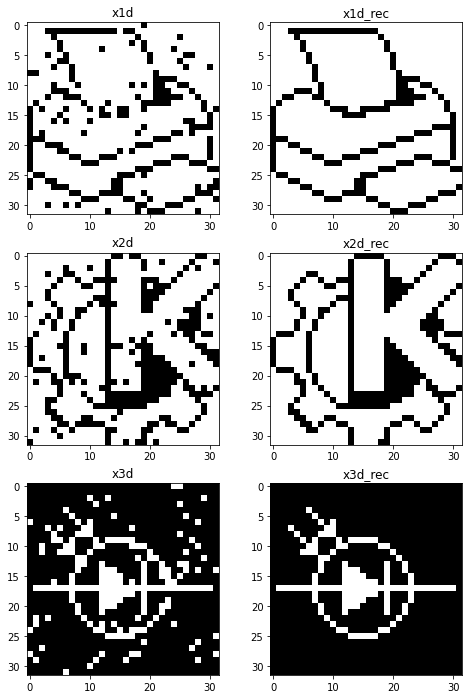

In [22]:
# Plot original and recovered distorted patterns
hopfield.show_img_patterns_distorted(Xd,Xd_rec,name='d',recovered=True)

### What happens if we select units randomly?

In [23]:
# Create random patterns
dim = 1024
n_patterns = 3
Xrand = hopfield.random_patterns(dim,n_patterns)

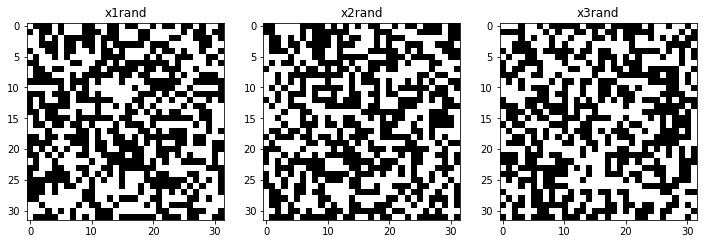

In [24]:
# Plot generated random patterns
hopfield.show_img_patterns(Xrand,name='rand')

In [25]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xrand_rec = np.zeros(np.shape(Xrand))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xrand[[i],:],n_steps)
    Xrand_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

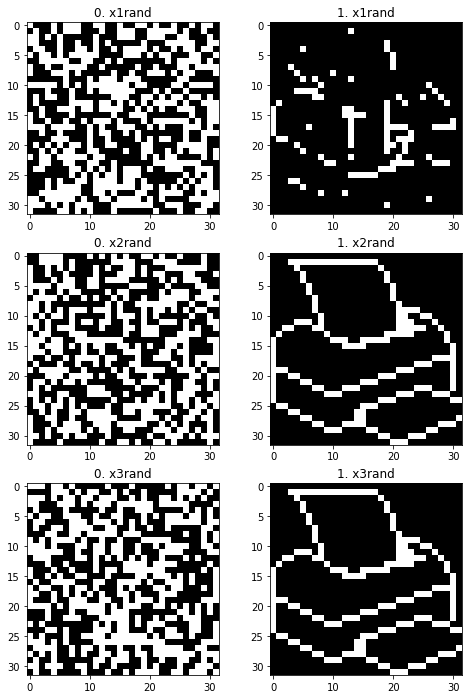

In [26]:
# Plot original and recovered distorted patterns
hopfield.show_img_patterns_gradually(Xs,grad_steps=1,name='rand')

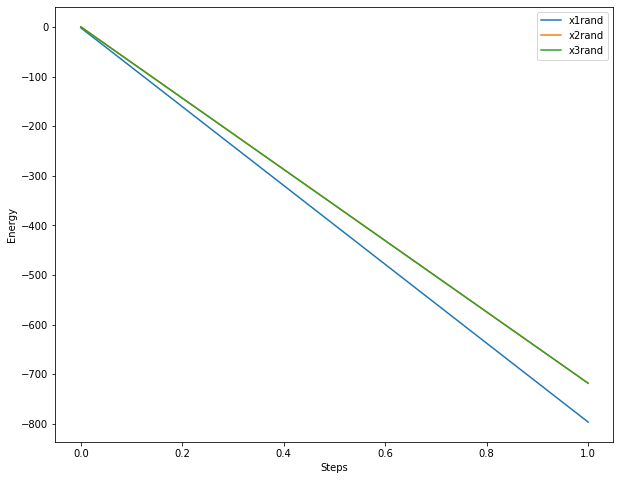

In [27]:
# Plot energys evolution
hopfield.plot_energy(Es,name='rand')

## Energy

### Random weight matrix

In [28]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])
# Compute weight matrix
hopnet.random_W()

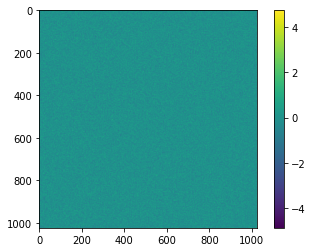

In [29]:
# Plot weights matrix
hopnet.plot_weights()

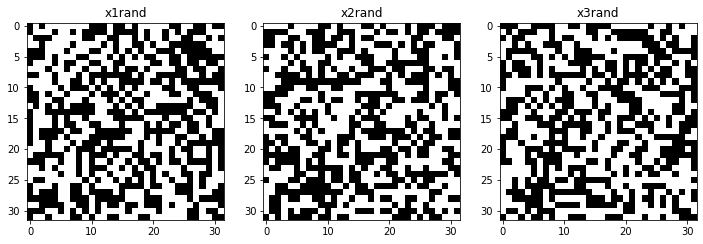

In [30]:
# Create random patterns
dim = 1024
n_patterns = 3
Xrand = hopfield.random_patterns(dim,n_patterns)
# Plot generated random patterns
hopfield.show_img_patterns(Xrand,name='rand')

In [31]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xrand_rec = np.zeros(np.shape(Xrand))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xrand[[i],:],n_steps)
    Xrand_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

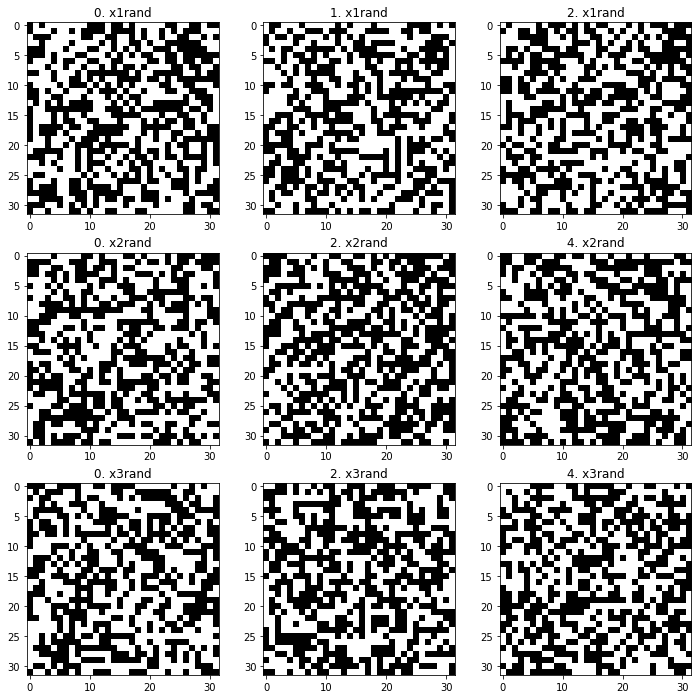

In [32]:
# Plot original and recovered distorted patterns
hopfield.show_img_patterns_gradually(Xs,grad_steps=2,name='rand')

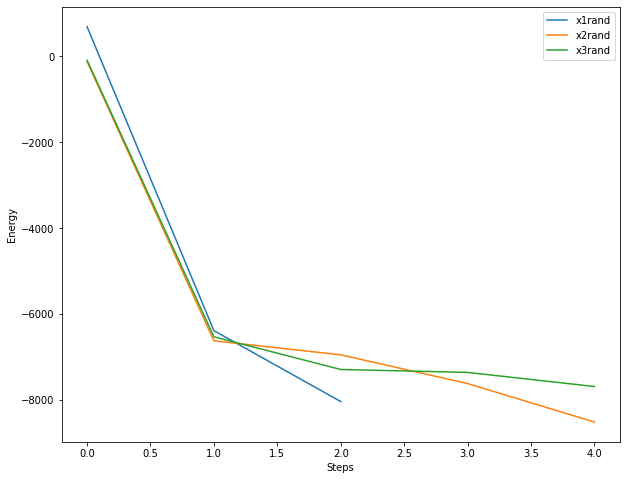

In [33]:
# Plot energys evolution
hopfield.plot_energy(Es,name='rand')

### What if random symmetric weight matrix?

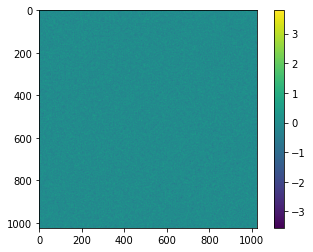

In [34]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])
# Compute weight matrix
hopnet.random_W(symmetric=True)
# Plot weights matrix
hopnet.plot_weights()

In [35]:
# Asynchronous recall over distorted patterns
n_steps = 50
Xrand_rec = np.zeros(np.shape(Xrand))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xrand[[i],:],n_steps)
    Xrand_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

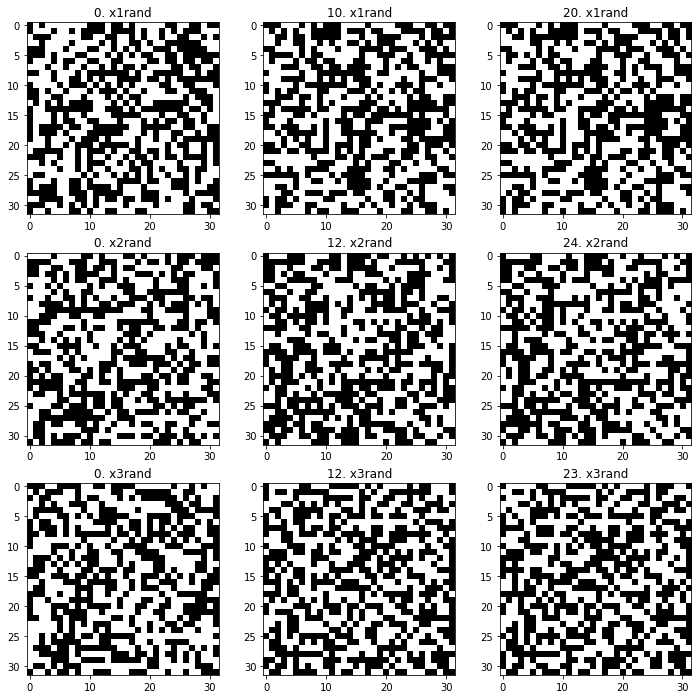

In [36]:
# Plot original and recovered distorted patterns
hopfield.show_img_patterns_gradually(Xs,grad_steps=2,name='rand')

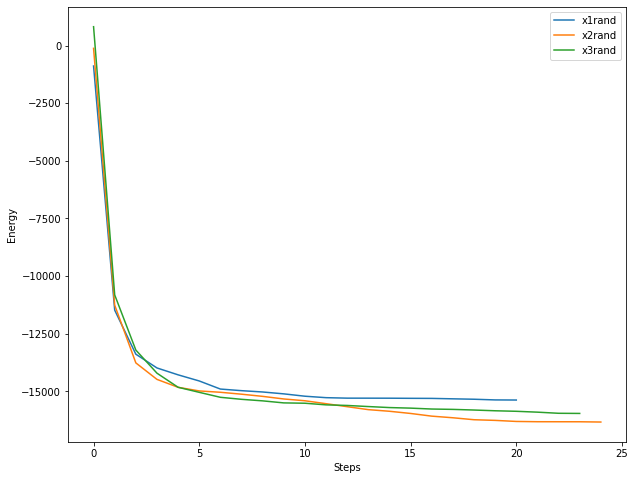

In [37]:
# Plot energys evolution
hopfield.plot_energy(Es,name='rand')

## Distortion Resistance

### How much noise can be removed?

In [2]:
# Define input patterns - Read row pictures data
pictures = np.genfromtxt('data/pict.dat', delimiter=',').reshape((11,1024))
X = pictures[0:3,:]

In [3]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])
# Compute weight matrix
hopnet.train_W(X)

In [4]:
# Generate set of patterns with increasing noise - First attractor
steps = 10
name = 1
stepsize = int(np.shape(X)[1]/steps)
x_orig = X[[name-1],:]
Xd = []
noises = []
for i in range(steps+1) :
    # Distort bits in each pattern
    Xd.append(hopfield.distort_patterns(x_orig,i*stepsize).reshape(-1))
    noises.append(i*stepsize)
Xd = np.array(Xd)

In [5]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

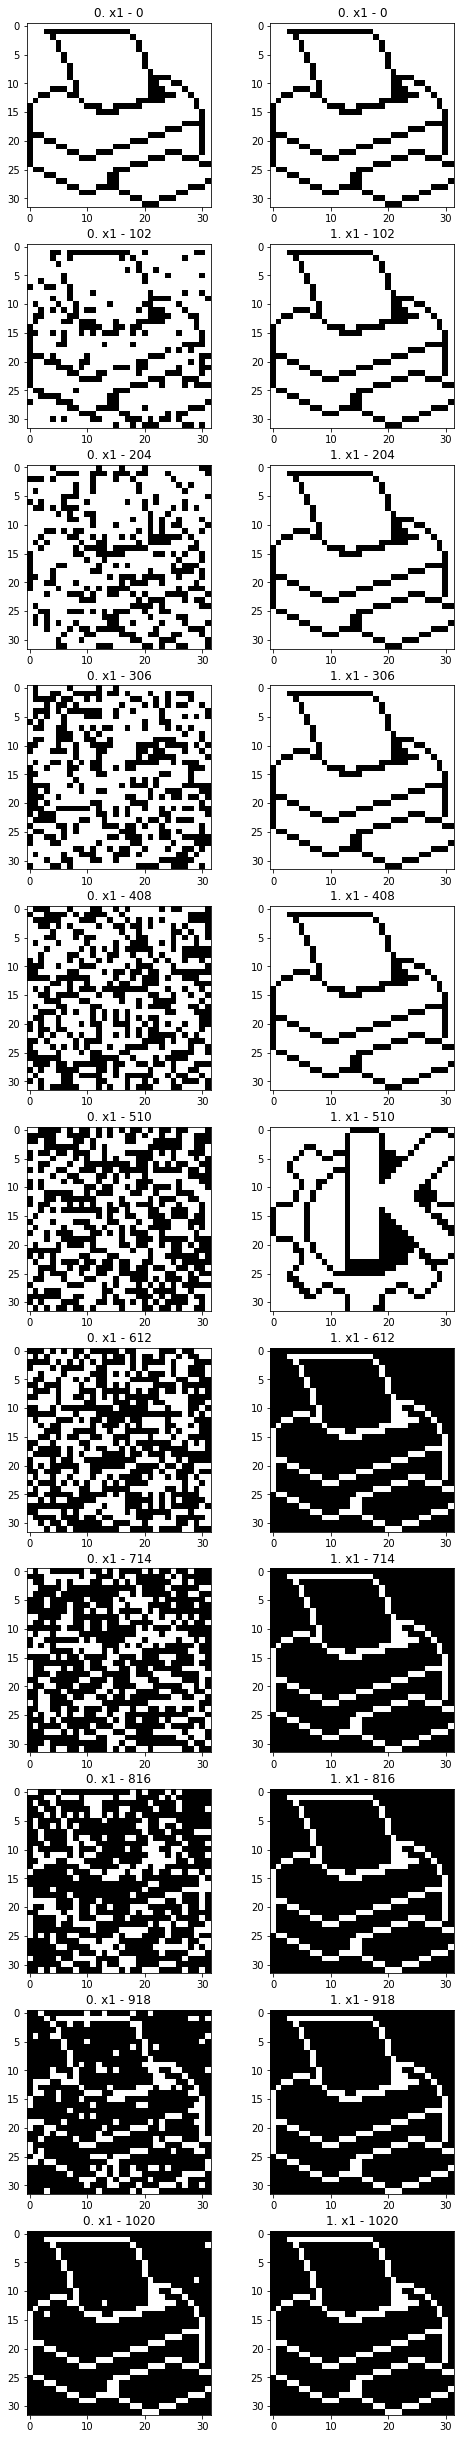

In [6]:
# Plot original and recovered distorted patterns
grad_steps = 1
hopfield.show_img_patterns_gradually_noisy(Xs,grad_steps,name,noises)

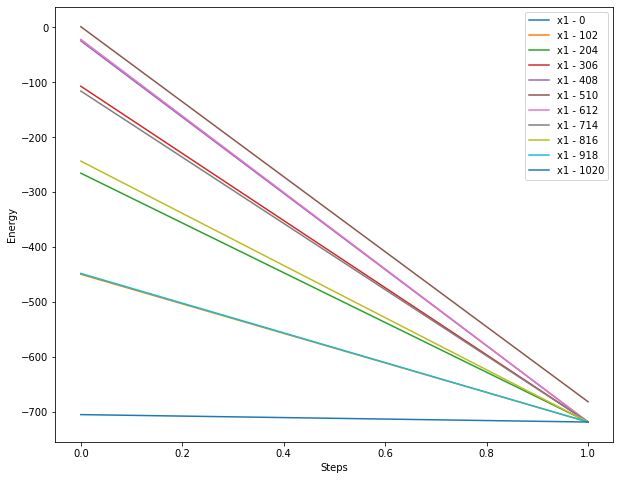

In [7]:
# Plot energys evolution
hopfield.plot_energy_noises(Es,name,noises)

In [8]:
# Generate set of patterns with increasing noise - Second attractor
steps = 10
name = 2
stepsize = int(np.shape(X)[1]/steps)
x_orig = X[[name-1],:]
Xd = []
noises = []
for i in range(steps+1) :
    # Distort bits in each pattern
    Xd.append(hopfield.distort_patterns(x_orig,i*stepsize).reshape(-1))
    noises.append(i*stepsize)
Xd = np.array(Xd)

In [9]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

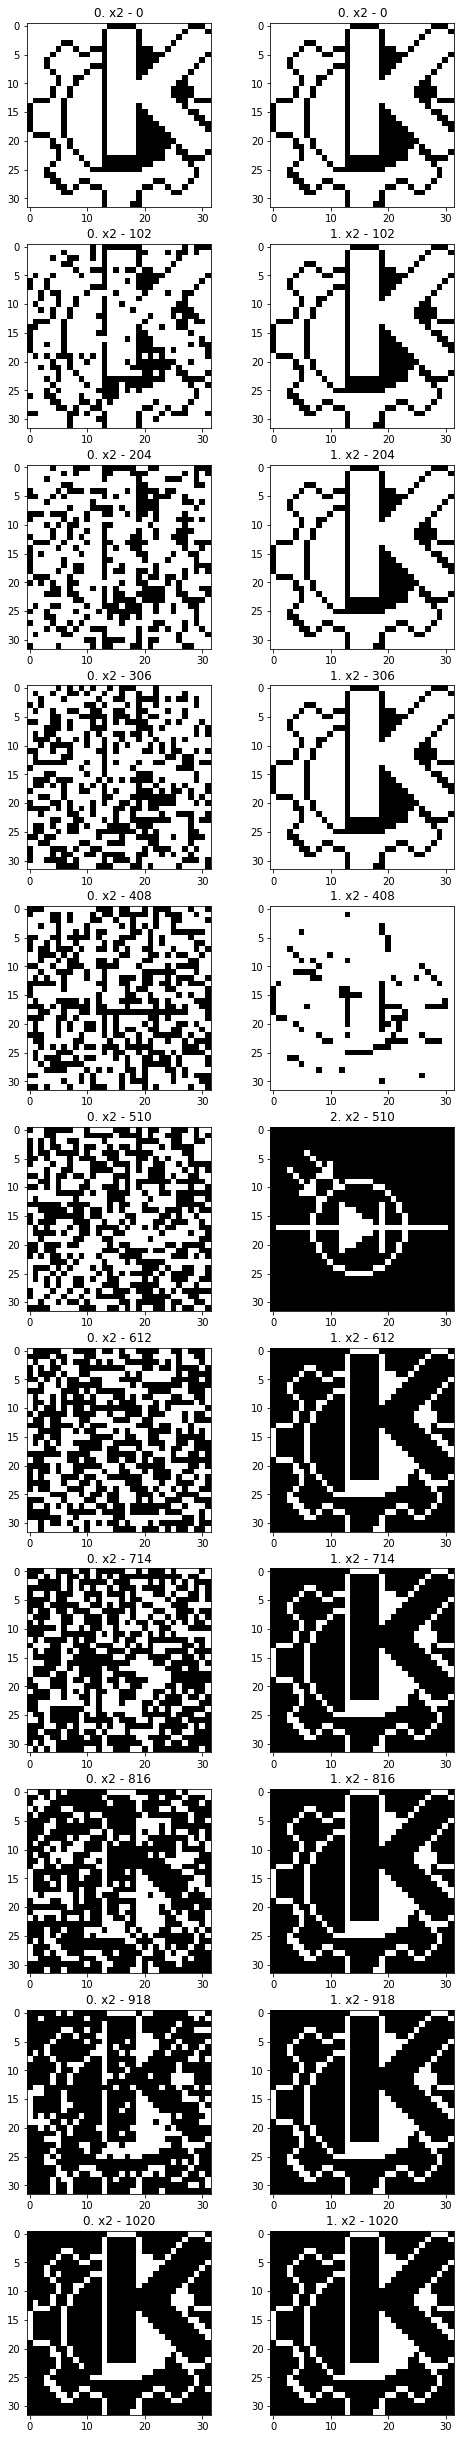

In [10]:
# Plot original and recovered distorted patterns
grad_steps = 1
hopfield.show_img_patterns_gradually_noisy(Xs,grad_steps,name,noises)

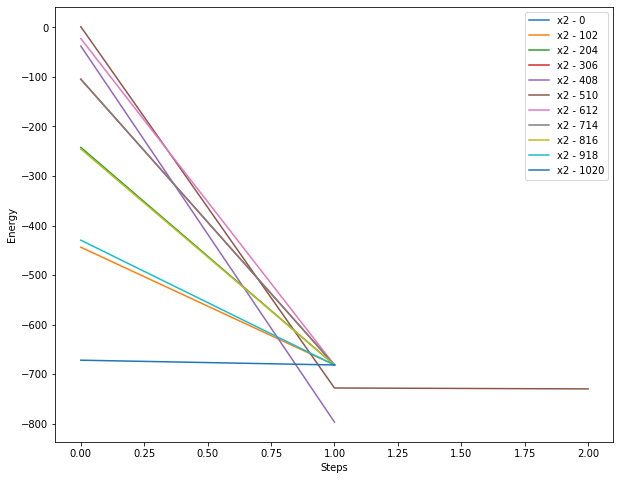

In [11]:
# Plot energys evolution
hopfield.plot_energy_noises(Es,name,noises)

In [12]:
# Generate set of patterns with increasing noise - Third attractor
steps = 10
name = 3
stepsize = int(np.shape(X)[1]/steps)
x_orig = X[[name-1],:]
Xd = []
noises = []
for i in range(steps+1) :
    # Distort bits in each pattern
    Xd.append(hopfield.distort_patterns(x_orig,i*stepsize).reshape(-1))
    noises.append(i*stepsize)
Xd = np.array(Xd)

In [13]:
# Asynchronous recall over distorted patterns
n_steps = 20
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
Xs = []
Es = []
for i in range(n_patterns) :
    xs, energys = hopnet.async_recall(Xd[[i],:],n_steps)
    Xd_rec[[i],:] = xs[-1]
    Xs.append(xs)
    Es.append(energys)

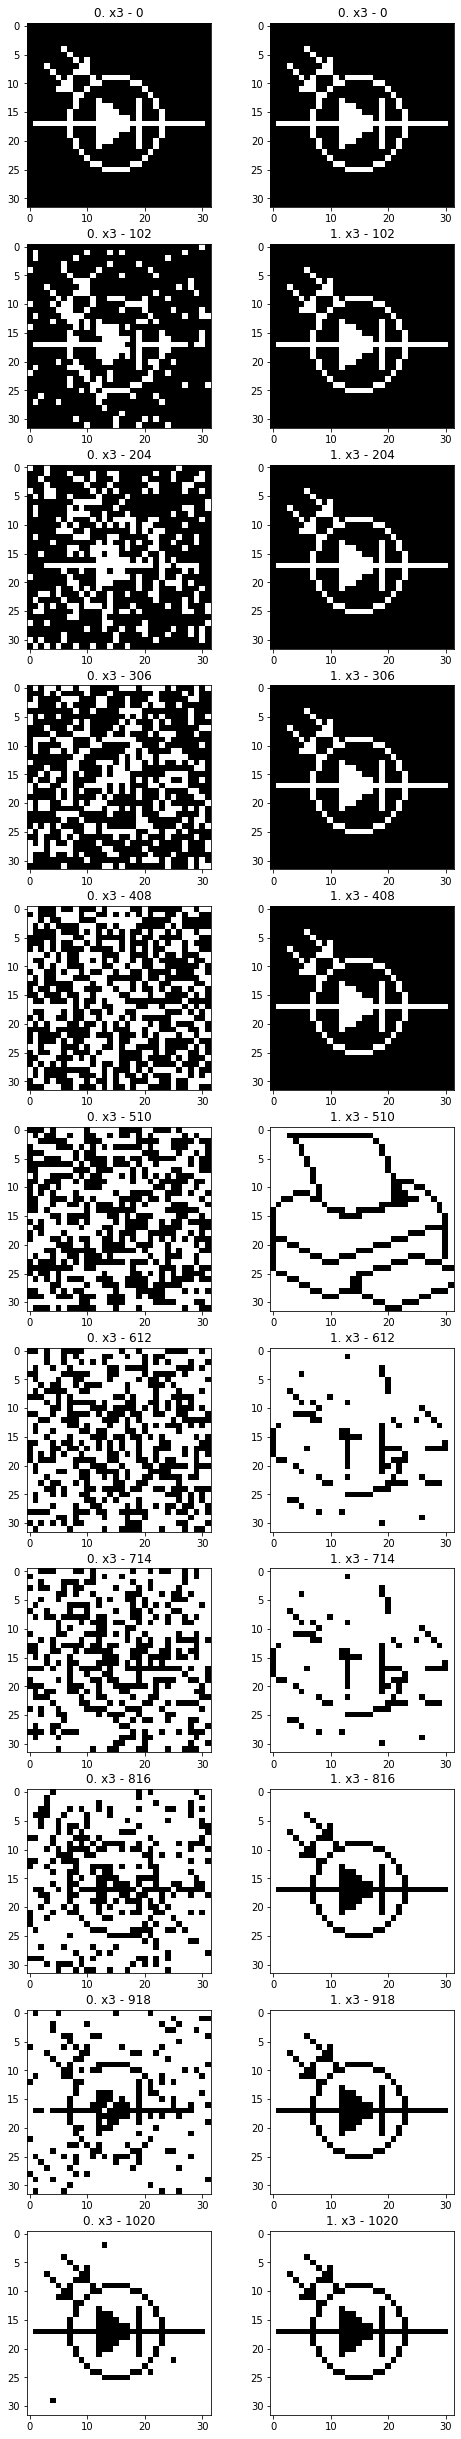

In [14]:
# Plot original and recovered distorted patterns
grad_steps = 1
hopfield.show_img_patterns_gradually_noisy(Xs,grad_steps,name,noises)

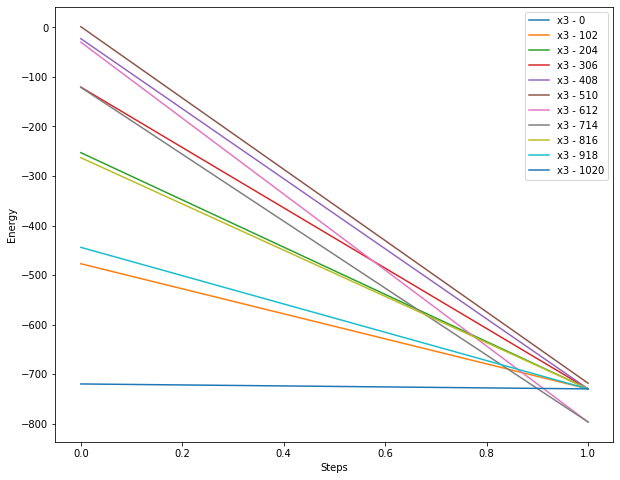

In [15]:
# Plot energys evolution
hopfield.plot_energy_noises(Es,name,noises)

### Linear combinations of memories

In [16]:
# Generate linear combinations
Xcombs,names = hopfield.linear_combs(X)

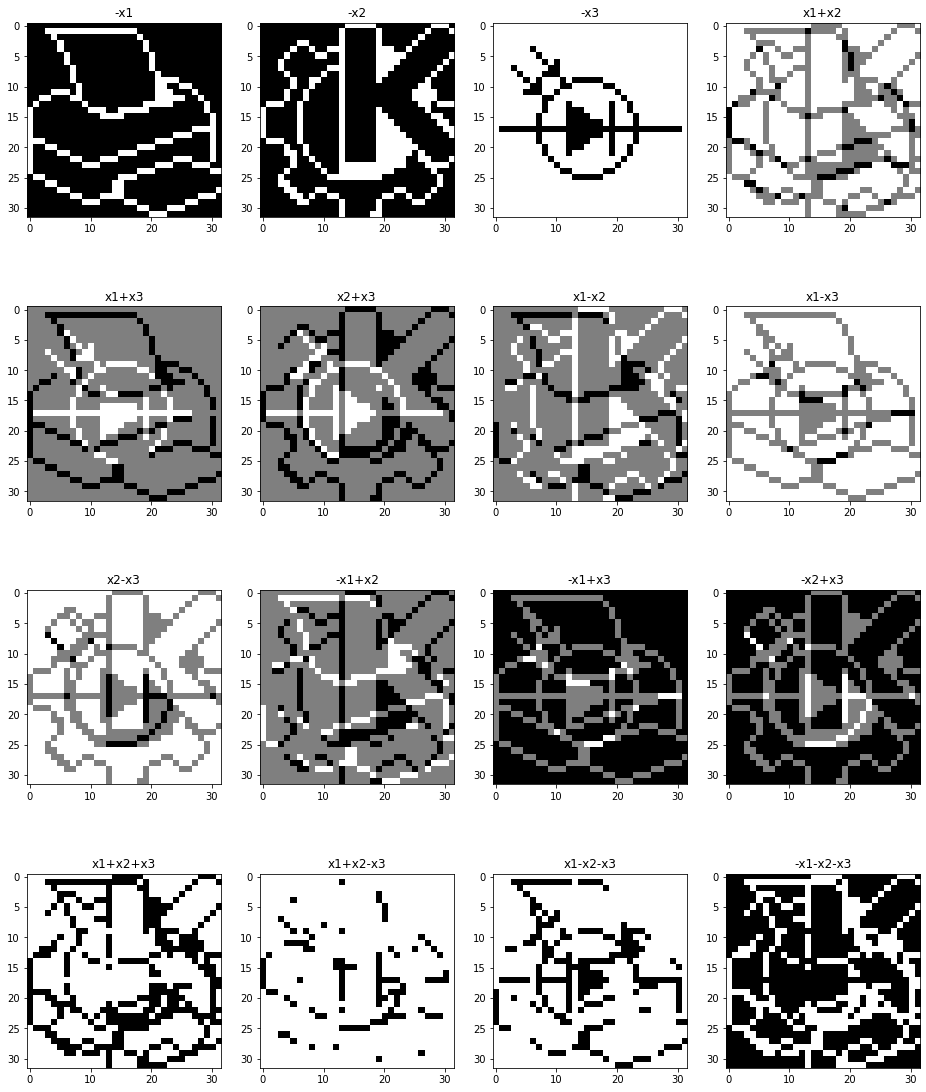

In [17]:
# Show combinations
hopfield.show_img_patterns_lin_combs(Xcombs,names)

## Capacity

### How many patterns can safely be stored?